In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('/content/ACME-HappinessSurvey2020.csv')
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##Data Cleaning

####Create a copy of base data for manupulation & pre- processing

In [4]:
happycustomer_data = data.copy()

In [5]:
happycustomer_data

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [6]:
happycustomer_data.shape

(126, 7)

In [7]:
happycustomer_data['Y'] = happycustomer_data['Y'].replace({0:'unhappy',1:'happy'})

In [8]:
happycustomer_data.head

<bound method NDFrame.head of            Y  X1  X2  X3  X4  X5  X6
0    unhappy   3   3   3   4   2   4
1    unhappy   3   2   3   5   4   3
2      happy   5   3   3   3   3   5
3    unhappy   5   4   3   3   3   5
4    unhappy   5   4   3   3   3   5
..       ...  ..  ..  ..  ..  ..  ..
121    happy   5   2   3   4   4   3
122    happy   5   2   3   4   2   5
123    happy   5   3   3   4   4   5
124  unhappy   4   3   3   4   4   5
125  unhappy   5   3   2   5   5   5

[126 rows x 7 columns]>

In [9]:
pd.set_option('display.max_columns',None)
happycustomer_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,unhappy,3,3,3,4,2,4
1,unhappy,3,2,3,5,4,3
2,happy,5,3,3,3,3,5
3,unhappy,5,4,3,3,3,5
4,unhappy,5,4,3,3,3,5


In [10]:
happycustomer_data.drop(["X2"],axis=1,inplace = True)

In [11]:
happycustomer_data.dtypes

Y     object
X1     int64
X3     int64
X4     int64
X5     int64
X6     int64
dtype: object

##Convert categorical feature to numerical feature

In [12]:
one_hot_encoded_data = pd.get_dummies(happycustomer_data, columns = [ 'Y'])
print(one_hot_encoded_data)

     X1  X3  X4  X5  X6  Y_happy  Y_unhappy
0     3   3   4   2   4        0          1
1     3   3   5   4   3        0          1
2     5   3   3   3   5        1          0
3     5   3   3   3   5        0          1
4     5   3   3   3   5        0          1
..   ..  ..  ..  ..  ..      ...        ...
121   5   3   4   4   3        1          0
122   5   3   4   2   5        1          0
123   5   3   4   4   5        1          0
124   4   3   4   4   5        0          1
125   5   2   5   5   5        0          1

[126 rows x 7 columns]


####Check the distribution of target variable

In [13]:
happycustomer_data['Y'].value_counts()

happy      69
unhappy    57
Name: Y, dtype: int64

##Declare feature vector and target variable

In [14]:
X = happycustomer_data.loc[:,happycustomer_data.columns!='Y']
y = happycustomer_data['Y']

In [15]:
X.shape

(126, 5)

#Split dataset into training and test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

##Data Visulization

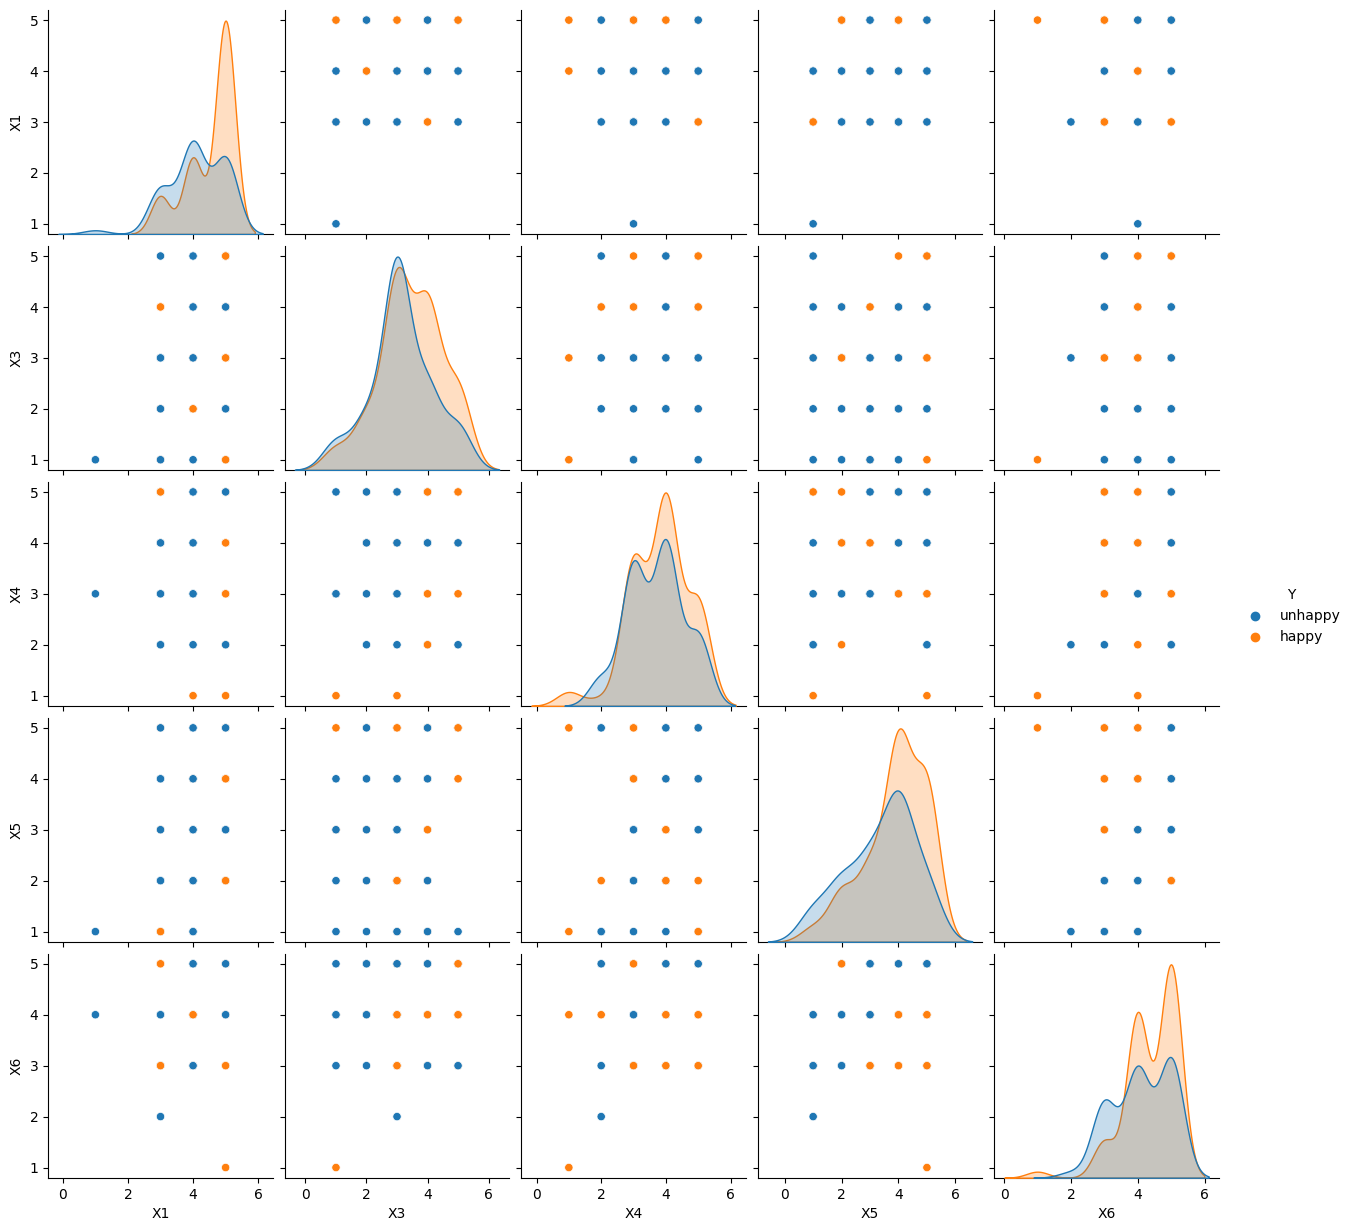

In [17]:
#pairplot
sns.pairplot(happycustomer_data,hue='Y')

<Axes: xlabel='X1', ylabel='Y'>

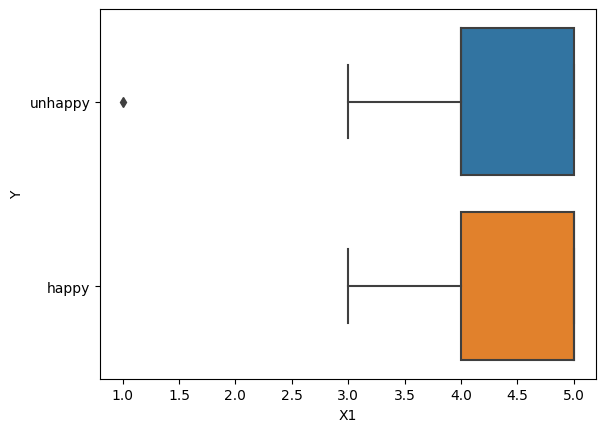

In [18]:
sns.boxplot(x='X1',y='Y',data=happycustomer_data)

<Axes: xlabel='X3', ylabel='Y'>

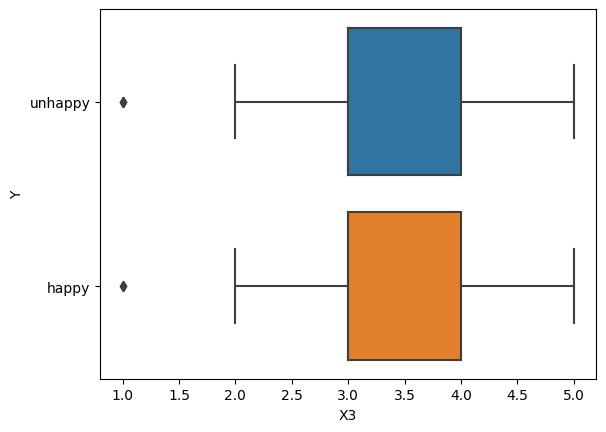

In [19]:
sns.boxplot(x='X3',y='Y',data=happycustomer_data)


<Axes: xlabel='X4', ylabel='Y'>

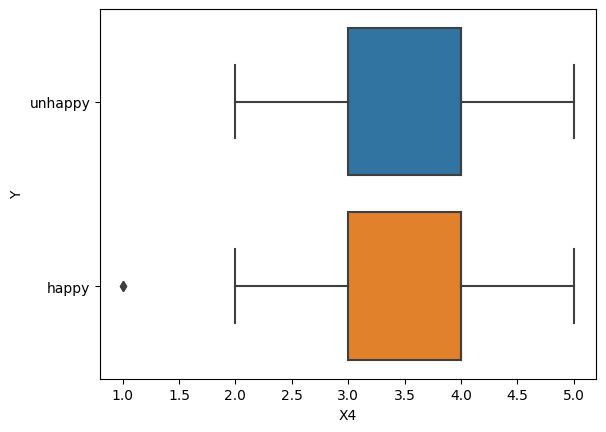

In [20]:
sns.boxplot(x='X4',y='Y',data=happycustomer_data)

<Axes: xlabel='X5', ylabel='Y'>

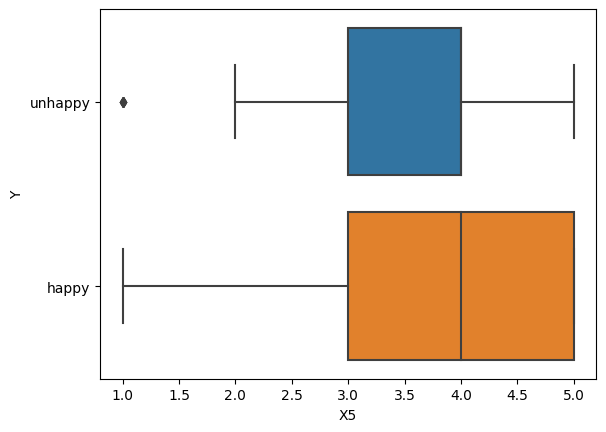

In [21]:
sns.boxplot(x='X5',y='Y',data=happycustomer_data)

<Axes: xlabel='X6', ylabel='Y'>

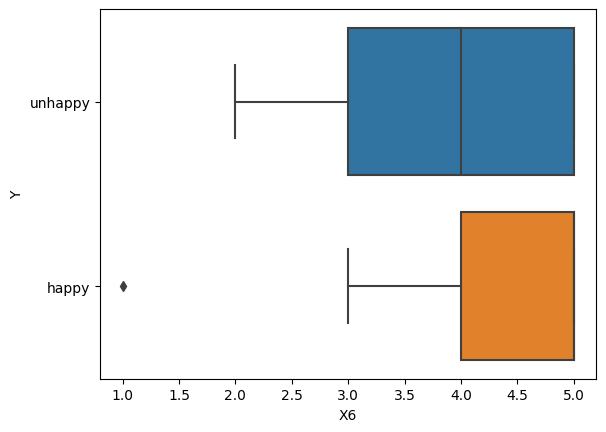

In [22]:
sns.boxplot(x='X6',y='Y',data=happycustomer_data)

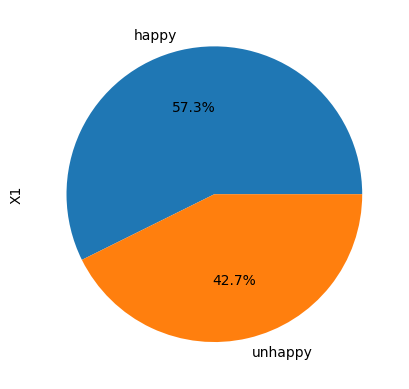

In [23]:
#pie plot
happycustomer_data_X1=happycustomer_data[['X1','Y']].groupby('Y').sum()
happycustomer_data_X1['X1'].plot(kind='pie',autopct='%1.1f%%')
plt.show()

##Linear Regression Models using pandas,matplotlib

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [25]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [26]:
data.shape

(126, 7)

In [27]:
data.isnull().sum()
#Checking for any Null values in the imported Datasets

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [28]:
#Assigning Dependent and Independent variables:
x=data.iloc[:,:1].values
y=data.iloc[:, 1:2].values

In [29]:
#Splitting the dataset into Training and Testing Dataset:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

In [30]:
#Fitting the Model (Linear Regression):
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [31]:
print(y_pred)
print(y_test)

[[4.04761905]
 [4.04761905]
 [4.56896552]
 [4.04761905]
 [4.04761905]
 [4.56896552]
 [4.04761905]
 [4.56896552]
 [4.56896552]
 [4.56896552]
 [4.04761905]
 [4.04761905]
 [4.56896552]
 [4.56896552]
 [4.04761905]
 [4.04761905]
 [4.56896552]
 [4.04761905]
 [4.56896552]
 [4.04761905]
 [4.56896552]
 [4.56896552]
 [4.04761905]
 [4.04761905]
 [4.04761905]
 [4.04761905]]
[[5]
 [4]
 [3]
 [4]
 [3]
 [5]
 [4]
 [5]
 [5]
 [3]
 [5]
 [4]
 [5]
 [5]
 [5]
 [5]
 [5]
 [3]
 [4]
 [4]
 [5]
 [3]
 [4]
 [3]
 [5]
 [5]]


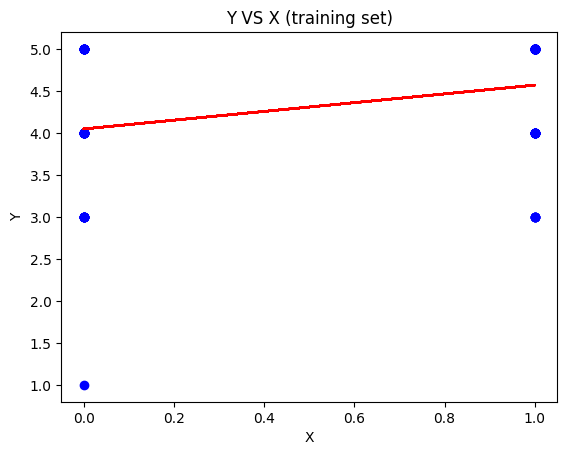

In [32]:
#Plot for Training dataset
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('Y VS X (training set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

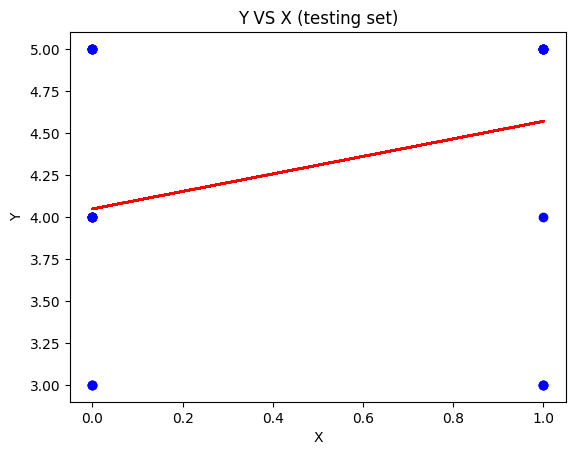

In [33]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('Y VS X (testing set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##Logistic Regression

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [35]:
happycustomer_data = data.copy()

In [36]:
#%% import dataset
data = pd.read_csv("/content/ACME-HappinessSurvey2020.csv")
y = happycustomer_data['Y']
x_data = data.drop(['X2'], axis=1)

In [37]:
# %% normalization
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [38]:
# %%train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6, 107)
x test:  (6, 19)
y train:  (107,)
y test:  (19,)


In [39]:
# %%initialize
# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [40]:
#%% sigmoid
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(5)

In [41]:
#%% forward and backward
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [42]:
#%%# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [43]:
#%%  # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

In [44]:
# sklearn
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 1.0 
train accuracy: 1.0 


##Hyper Parameters Tuning

In [45]:
#importing modules
import numpy as np
import pandas as pd

#loading datasets
data = pd.read_csv("/content/ACME-HappinessSurvey2020.csv")

In [46]:
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [47]:
data=pd.read_csv('/content/ACME-HappinessSurvey2020.csv')
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [48]:
#Load dataset
train = pd.read_csv("/content/ACME-HappinessSurvey2020.test.csv")
test  = pd.read_csv("/content/ACME-HappinessSurvey2020.train.csv")

In [49]:
data.drop("X2",axis=1,inplace=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X3      126 non-null    int64
 3   X4      126 non-null    int64
 4   X5      126 non-null    int64
 5   X6      126 non-null    int64
dtypes: int64(6)
memory usage: 6.0 KB


In [51]:
data.value_counts()

Y  X1  X3  X4  X5  X6
1  5   5   5   5   5     6
       4   3   4   5     5
           4   4   5     3
   4   3   4   4   4     3
0  5   3   3   3   5     3
                        ..
       1   5   3   5     1
   4   5   5   1   3     1
       4   5   4   3     1
           4   3   4     1
   5   5   4   5   5     1
Length: 93, dtype: int64

In [52]:
print(train.shape)
print(test.shape)

(126, 7)
(126, 7)


In [53]:
#making independent variables for training
train_X = train.iloc[:, 1:31]
#making responsible variables for training
train_y = train
#making independent variables for testing
test_X = test.iloc[:, 1:31]
#making responsible variables for testing
test_y =test

In [54]:
#finding out the results
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(126, 6)
(126, 7)
(126, 6)
(126, 7)


In [55]:
# Hyper Parameter Tuning
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
			"max_features": randint(1, 9),
			"min_samples_leaf": randint(1, 9),
			"criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2}
Best score is 0.6756923076923077


##Random Forest Classification

In [56]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
# Splitting the dataset features into X and y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [60]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 5)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5)

In [78]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4 4]
 [4 4]
 [3 4]
 [4 4]
 [5 5]
 [4 4]
 [4 4]
 [5 5]
 [5 5]
 [5 4]
 [3 3]
 [4 3]
 [4 3]
 [5 3]
 [3 5]
 [4 5]
 [5 5]
 [4 4]
 [4 4]
 [5 5]
 [5 5]
 [5 4]
 [3 2]
 [5 5]
 [5 5]
 [5 3]
 [5 3]
 [4 3]
 [5 5]
 [4 4]
 [5 5]
 [4 3]]


In [79]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  1  0  0]
 [ 0  1  4  3]
 [ 0  1  8  2]
 [ 0  1  1 10]]


0.59375

In [82]:
X = happycustomer_data.loc[:,happycustomer_data.columns!='Y']
y = happycustomer_data['Y']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.334, random_state = 0)

In [84]:
one_hot_encoded_data = pd.get_dummies(happycustomer_data, columns = [ 'Y'])
print(one_hot_encoded_data)

     X1  X2  X3  X4  X5  X6  Y_0  Y_1
0     3   3   3   4   2   4    1    0
1     3   2   3   5   4   3    1    0
2     5   3   3   3   3   5    0    1
3     5   4   3   3   3   5    1    0
4     5   4   3   3   3   5    1    0
..   ..  ..  ..  ..  ..  ..  ...  ...
121   5   2   3   4   4   3    0    1
122   5   2   3   4   2   5    0    1
123   5   3   3   4   4   5    0    1
124   4   3   3   4   4   5    1    0
125   5   3   2   5   5   5    1    0

[126 rows x 8 columns]


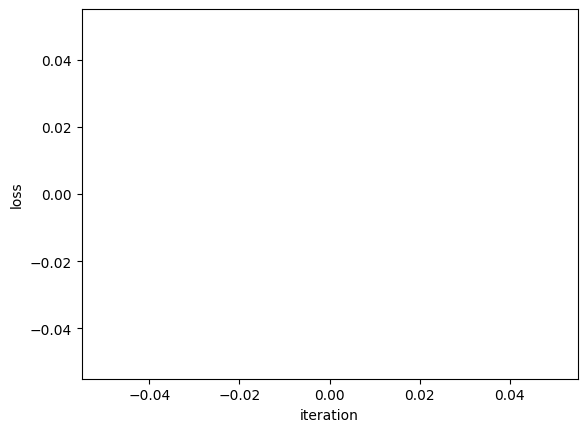

In [86]:
loss_v=[]
plt.plot(range(len(loss_v)),loss_v)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

##LightGBM Model Development and Training

In [89]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 49, number of negative: 34
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 83, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.590361 -> initscore=0.365460
[LightGBM] [Info] Start training from score 0.365460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMClassifier()

##Model Prediction

In [90]:
# predict the results
y_pred=clf.predict(X_test)

##View Accuracy

In [91]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.5581


##Compare train and test set accuracy

In [92]:
y_pred_train = clf.predict(X_train)

In [93]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6867


In [94]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.6867
Test set score: 0.5581


##Confusion-matrix

In [95]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 9 14]
 [ 5 15]]

True Positives(TP) =  9

True Negatives(TN) =  15

False Positives(FP) =  14

False Negatives(FN) =  5


<Axes: >

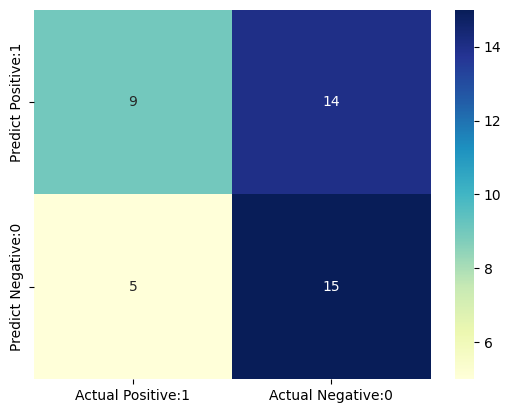

In [96]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##Classification Metrices

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.39      0.49        23
           1       0.52      0.75      0.61        20

    accuracy                           0.56        43
   macro avg       0.58      0.57      0.55        43
weighted avg       0.58      0.56      0.54        43



##Prediction with Gradient Boosting classifier

In [98]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [100]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 6 to 44
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      88 non-null     int64
 1   X2      88 non-null     int64
 2   X3      88 non-null     int64
 3   X4      88 non-null     int64
 4   X5      88 non-null     int64
 5   X6      88 non-null     int64
dtypes: int64(6)
memory usage: 4.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 8 to 66
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      38 non-null     int64
 1   X2      38 non-null     int64
 2   X3      38 non-null     int64
 3   X4      38 non-null     int64
 4   X5      38 non-null     int64
 5   X6      38 non-null     int64
dtypes: int64(6)
memory usage: 2.1 KB


(None, None)

In [101]:
# generate training target set (ytrain)
y_train

6      0
59     1
104    0
95     1
109    1
      ..
67     0
64     1
117    1
47     0
44     1
Name: Y, Length: 88, dtype: int64

In [102]:
# shapes of train and test sets
y_train.shape, y_test.shape

((88,), (38,))

In [103]:
# join train and test sets to form a new train_test set
#train_test =  y_train.append(y_test)

In [104]:
# transform data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [105]:
from sklearn.model_selection import train_test_split

X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train_scale, y_train, random_state=0)

In [106]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [107]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_sub, y_train_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_sub, y_validation_sub)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.712
Accuracy score (validation): 0.409

Learning rate:  0.1
Accuracy score (training): 0.773
Accuracy score (validation): 0.455

Learning rate:  0.25
Accuracy score (training): 0.864
Accuracy score (validation): 0.545

Learning rate:  0.5
Accuracy score (training): 0.894
Accuracy score (validation): 0.500

Learning rate:  0.75
Accuracy score (training): 0.939
Accuracy score (validation): 0.500

Learning rate:  1
Accuracy score (training): 0.924
Accuracy score (validation): 0.500



In [108]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train_sub, y_train_sub)
predictions = gb.predict(X_validation_sub)

print("Confusion Matrix:")
print(confusion_matrix(y_validation_sub, predictions))
print()
print("Classification Report")
print(classification_report(y_validation_sub, predictions))

Confusion Matrix:
[[5 4]
 [7 6]]

Classification Report
              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.60      0.46      0.52        13

    accuracy                           0.50        22
   macro avg       0.51      0.51      0.50        22
weighted avg       0.53      0.50      0.50        22



In [109]:
# ROC curve and Area-Under-Curve (AUC)

y_scores_gb = gb.decision_function(X_validation_sub)
fpr_gb, tpr_gb, _ = roc_curve(y_validation_sub, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.42


##Decision-Tree Algorithm

###Decision Tree Classifier with criterion gini index

In [110]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [112]:
import warnings

warnings.filterwarnings('ignore')

In [113]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

##Predict the Test set results with criterion gini index

In [114]:
y_pred_gini = clf_gini.predict(X_test)

##Check accuracy score with criterion gini index

In [115]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5789


In [116]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [117]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7273


##Check for overfitting and underfitting

In [118]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7273
Test set score: 0.5789


##Visualize decision-trees

[Text(0.5, 0.875, 'x[0] <= 4.5\ngini = 0.483\nsamples = 88\nvalue = [36, 52]'),
 Text(0.2, 0.625, 'x[5] <= 3.5\ngini = 0.493\nsamples = 41\nvalue = [23, 18]'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.3, 0.375, 'x[4] <= 4.5\ngini = 0.498\nsamples = 34\nvalue = [16, 18]'),
 Text(0.2, 0.125, 'gini = 0.487\nsamples = 31\nvalue = [13, 18]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.625, 'x[3] <= 4.5\ngini = 0.4\nsamples = 47\nvalue = [13, 34]'),
 Text(0.7, 0.375, 'x[4] <= 3.5\ngini = 0.461\nsamples = 36\nvalue = [13, 23]'),
 Text(0.6, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.8, 0.125, 'gini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]')]

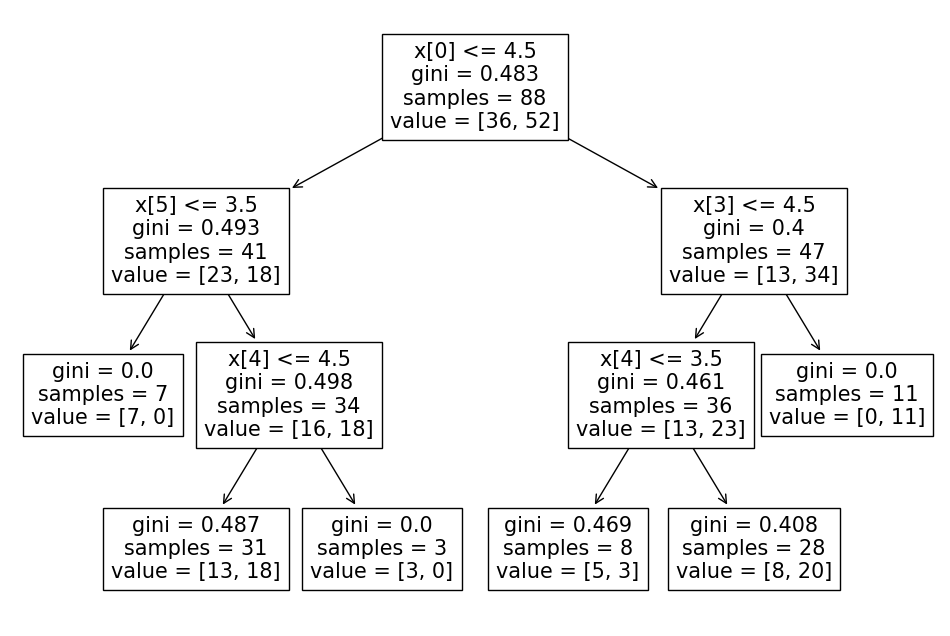

In [119]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

##Visualize decision-trees with graphviz

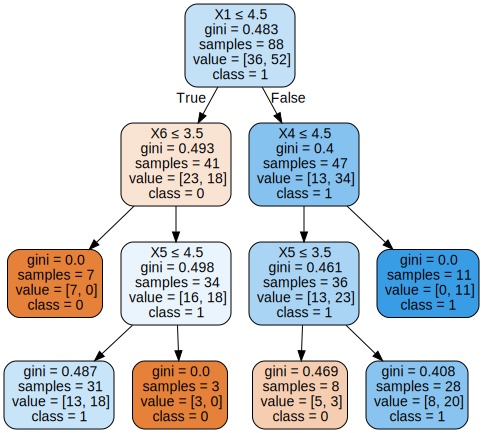

In [120]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=['0','1'] ,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

##Decision Tree Classifier with criterion entropy

In [121]:

# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

##Predict the Test set results with criterion entropy

In [122]:
y_pred_en = clf_en.predict(X_test)

##Check accuracy score with criterion entropy

In [123]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5526


##Compare the train-set and test-set accuracy

###Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [124]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

###Check for overfitting and underfitting

In [125]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7841
Test set score: 0.5526


###Visualize decision-trees

[Text(0.4642857142857143, 0.9166666666666666, 'x[0] <= 4.5\nentropy = 0.976\nsamples = 88\nvalue = [36, 52]'),
 Text(0.21428571428571427, 0.75, 'x[5] <= 3.5\nentropy = 0.989\nsamples = 41\nvalue = [23, 18]'),
 Text(0.14285714285714285, 0.5833333333333334, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.2857142857142857, 0.5833333333333334, 'x[4] <= 4.5\nentropy = 0.998\nsamples = 34\nvalue = [16, 18]'),
 Text(0.21428571428571427, 0.4166666666666667, 'x[3] <= 4.5\nentropy = 0.981\nsamples = 31\nvalue = [13, 18]'),
 Text(0.14285714285714285, 0.25, 'x[0] <= 2.0\nentropy = 0.971\nsamples = 30\nvalue = [12, 18]'),
 Text(0.07142857142857142, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.08333333333333333, 'entropy = 0.958\nsamples = 29\nvalue = [11, 18]'),
 Text(0.2857142857142857, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.35714285714285715, 0.4166666666666667, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.

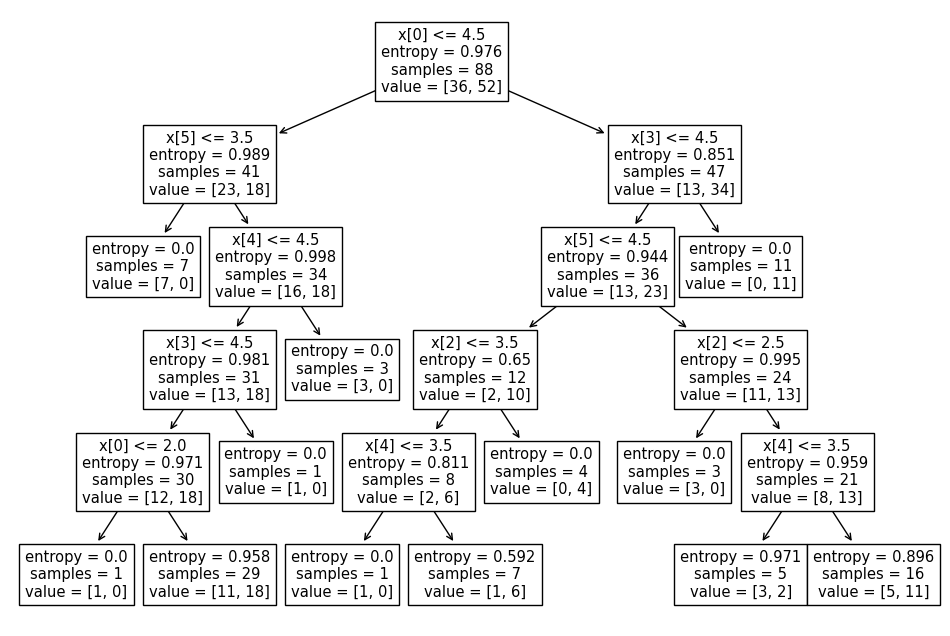

In [126]:

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

###Visualize decision-trees with graphviz

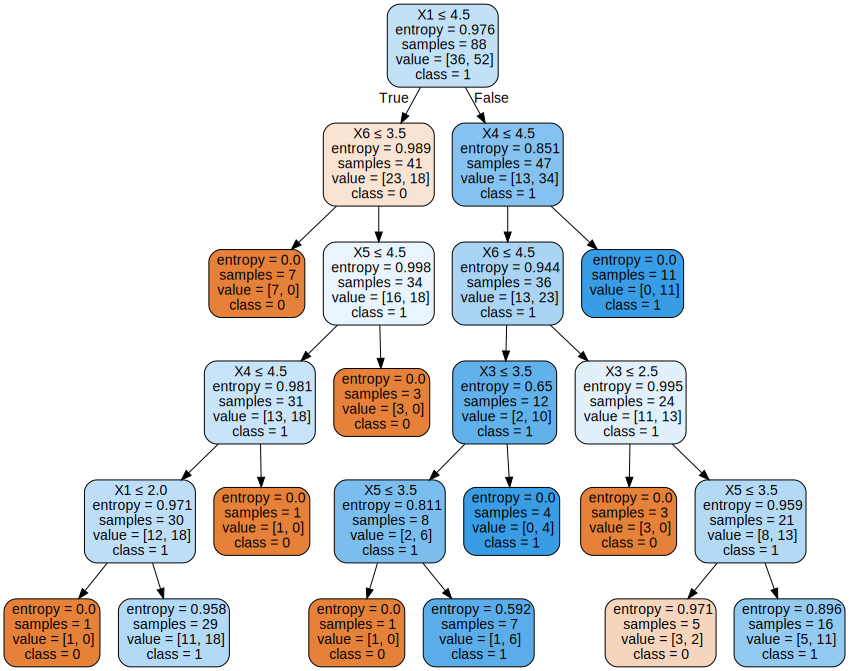

In [127]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=['0','1'],
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

###Confusion matrix

In [128]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 9 12]
 [ 5 12]]


###Classification Report

In [129]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.64      0.43      0.51        21
           1       0.50      0.71      0.59        17

    accuracy                           0.55        38
   macro avg       0.57      0.57      0.55        38
weighted avg       0.58      0.55      0.55        38



###Random Forest Classifier model with default parameters

In [130]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.5000


#Random Forest Classifier model with parameter n_estimators=100

In [131]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)


# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.5000


##Find important features with Random Forest model

In [132]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [133]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

X3    0.184459
X5    0.175602
X2    0.172840
X1    0.163095
X4    0.157796
X6    0.146208
dtype: float64

##Visualize feature scores of the features

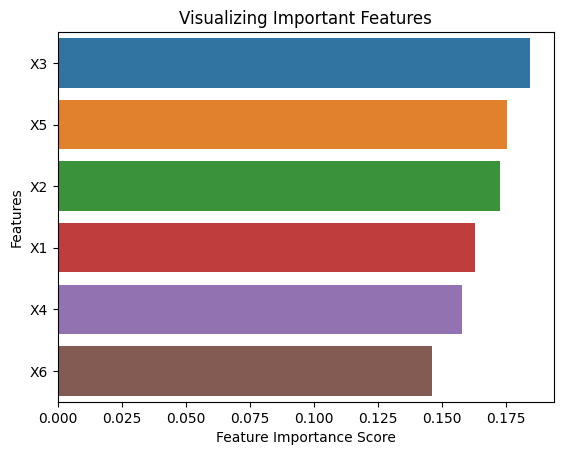

In [134]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

##Build Random Forest model on selected features

In [135]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [136]:
y_pred_train_RF = clf.predict(X_test)

y_pred_train_RF

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

##Confusion matrix

In [137]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_train_RF)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[19  4]
 [ 4 15]]
